<a href="https://colab.research.google.com/github/whrui720/SMA-PairsTrade/blob/main/MDST_Moving_Averages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

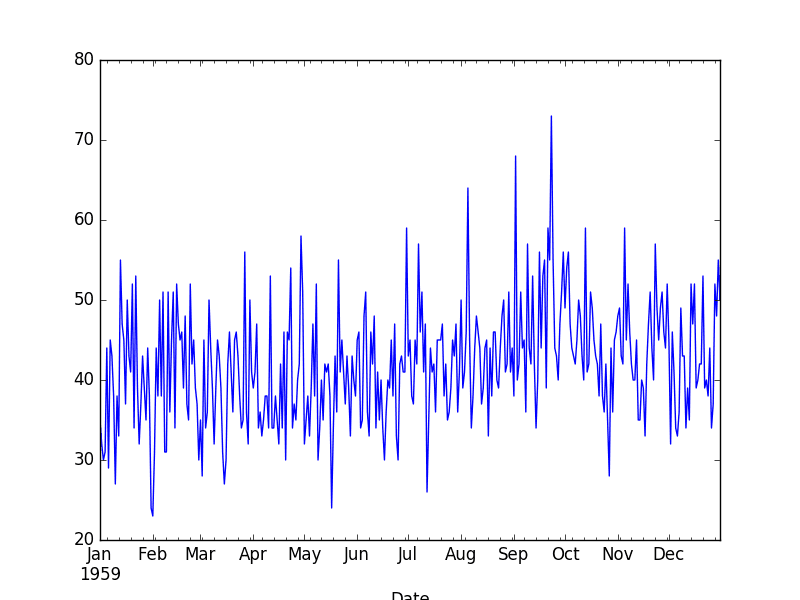





In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt

ticker = 'PG'
start_date = dt.date(2022, 1, 1)
end_date = dt.date(2023, 1, 1)
df = yf.download(ticker, start=start_date, end=end_date)['Close']
df.tail()

[*********************100%%**********************]  1 of 1 completed


Date
2022-12-23    152.619995
2022-12-27    153.949997
2022-12-28    151.960007
2022-12-29    152.589996
2022-12-30    151.559998
Name: Close, dtype: float64

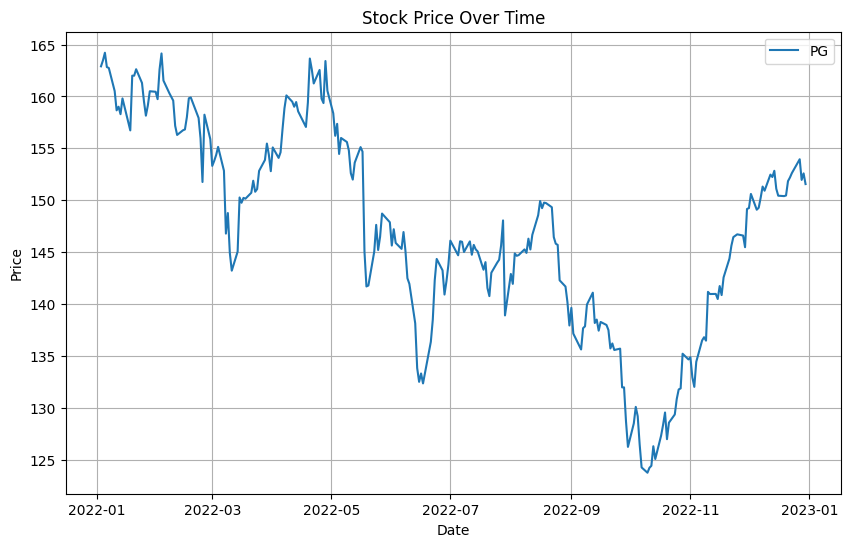

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df.values, label=ticker)
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Moving Average Formula:
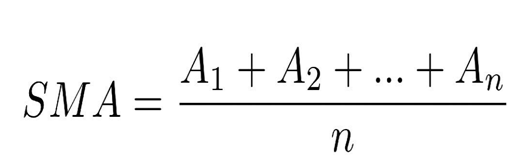

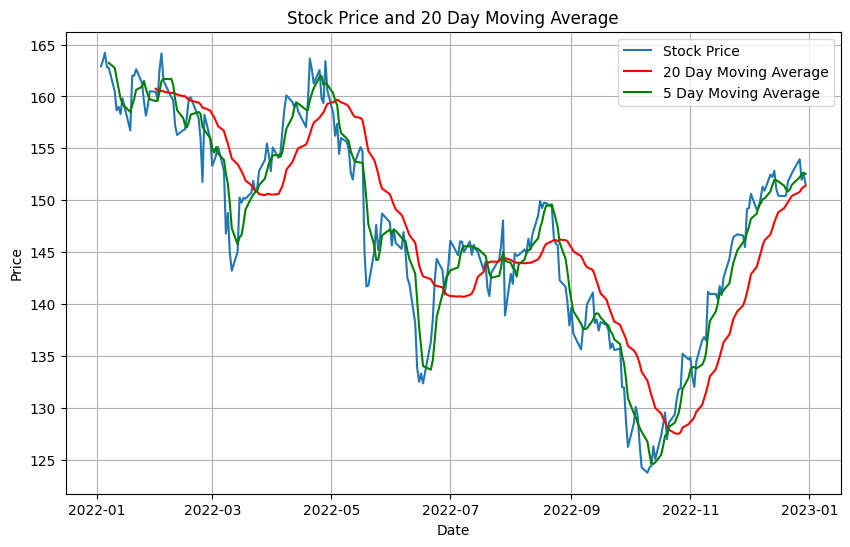

In [ ]:
moving_avg_20 = df.rolling(window=20).mean()
moving_avg_5 = df.rolling(window=5).mean()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df.values, label='Stock Price')
plt.plot(moving_avg_20.index, moving_avg_20.values, label='20 Day Moving Average', color='red')
plt.plot(moving_avg_5.index, moving_avg_5.values, label='5 Day Moving Average', color='green')
plt.title('Stock Price and 20 Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

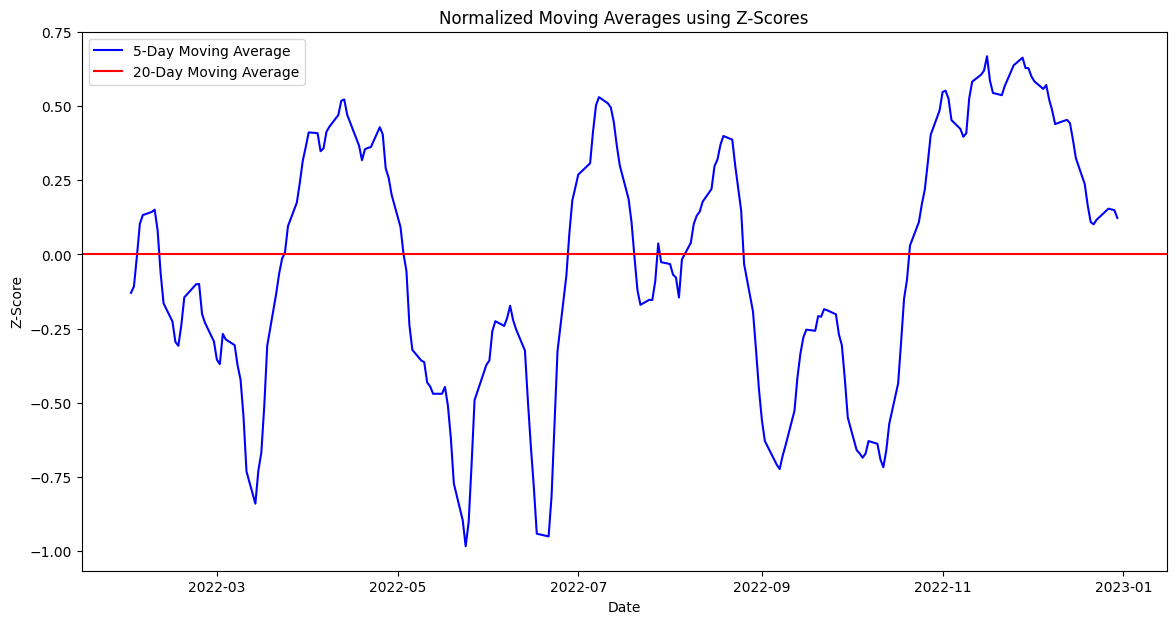

In [ ]:
std_20 = moving_avg_20.std()
ma_5_zscore = (moving_avg_5 - moving_avg_20) / std_20

plt.figure(figsize=(14, 7))
plt.plot(ma_5_zscore.index, ma_5_zscore.values, label='5-Day Moving Average', color='blue')
plt.axhline(y=0, color='red', linestyle='-', label='20-Day Moving Average')
plt.title('Normalized Moving Averages using Z-Scores')
plt.xlabel('Date')
plt.ylabel('Z-Score')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


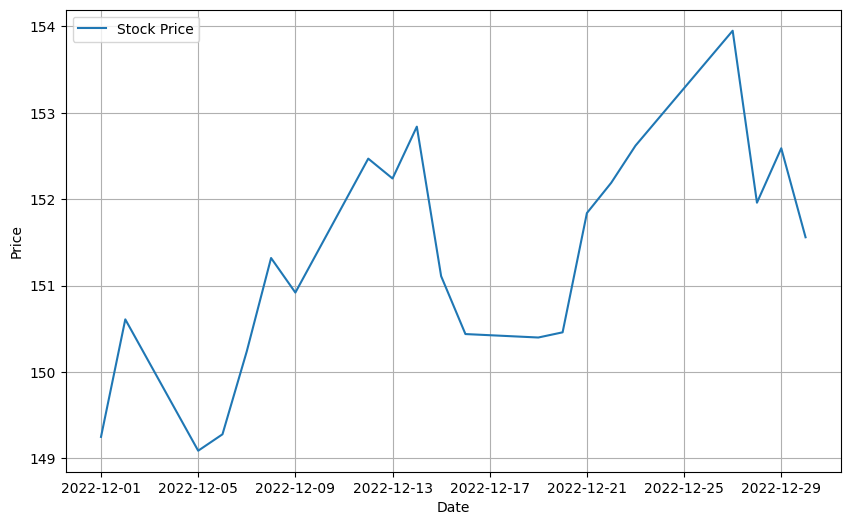

In [ ]:
start_date = dt.date(2022, 12, 1)
end_date = dt.date(2023, 1, 1)
df1 = yf.download(ticker, start=start_date, end=end_date)['Close']
plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1.values, label='Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

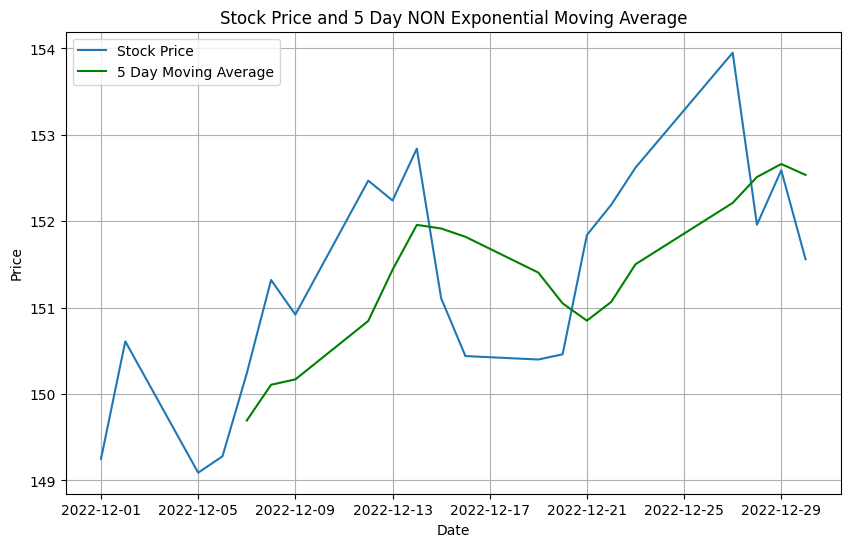

In [ ]:
moving_avg_20 = df1.rolling(window=5).mean()

plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1.values, label='Stock Price')
plt.plot(moving_avg_20.index, moving_avg_20.values, label='5 Day Moving Average', color='green')
plt.title('Stock Price and 5 Day NON Exponential Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

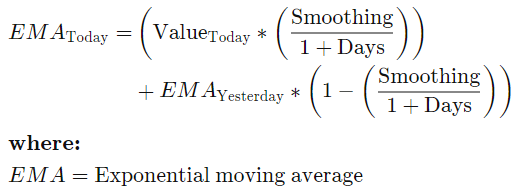

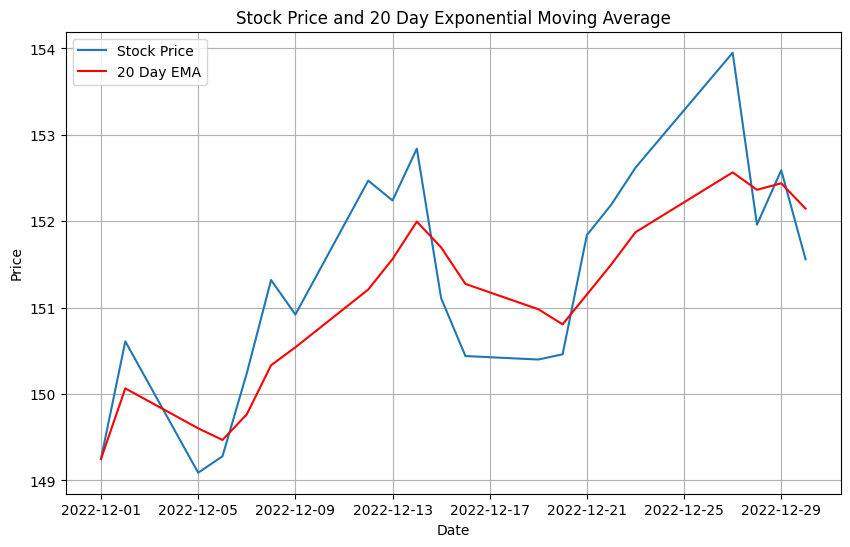

In [ ]:
exp_moving_avg = df1.ewm(span=5, adjust='false').mean()

plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1.values, label='Stock Price')
plt.plot(exp_moving_avg.index, exp_moving_avg.values, label='20 Day EMA', color='red')
plt.title('Stock Price and 20 Day Exponential Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()